# Decision Trees

## 1 - Understanding the influence of hyperparameters - Simulated data

We want to study the influence of the different hyperparameters of a decision tree on its predictive performance. 

We first use the following lines to generate and plot our dataset, containing two input variables and one binary output. We are well aware that this is nothing like a real dataset. However, it is often better to look at a method applied on synthetic data to understand its behavior.  

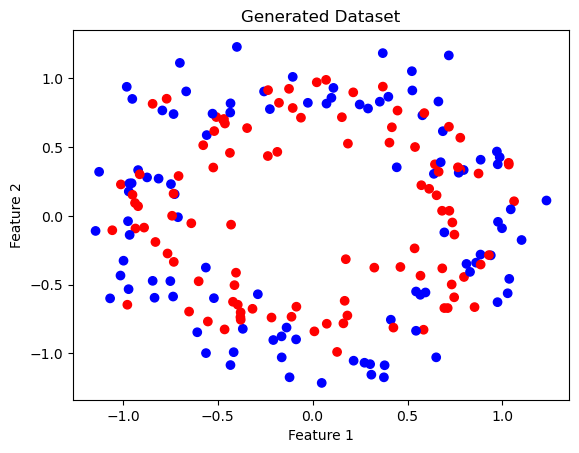

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate a classification dataset composed of two circles
#Generating a training set
X_train, y_train = make_circles(n_samples=200, noise=0.17)
#Generating a test set
X_test, y_test = make_circles(n_samples=10000, noise=0.17)

# Plot the generated dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Dataset')
plt.show()

**1) Using 'DecisionTreeClassifier', fit a decision tree with the default parameters on the training set. Compute its accuracy on the training set and test set. Comment.**

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the classes for the train set
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("The accuracy on the train set is ", accuracy_train)
print("The accuracy on the test set is ", accuracy_test)

# The accuracy is equal to one on the training set. It is too good to be true. 
# Indeed, the performance on the test is much lower. 

The accuracy on the train set is  1.0
The accuracy on the test set is  0.6235


**2) You can plot the decision frontier with the following lines. Comment.**

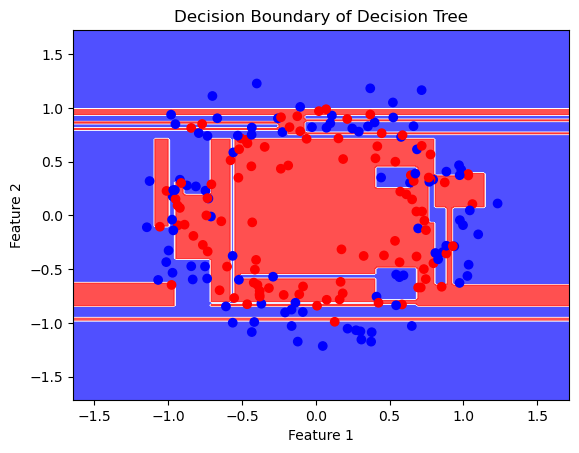

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Determine the range for the plot
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

# Create a grid of points and classify each point
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Decision Tree')
plt.show()

# We see that the frontier decision is too precise to capture the behavior of the data. 
# Since we used default parameter, the tree is fully grown, so it fits perfectly to the training set.
# Therefore, it fails to detect the general pattern (here circles) in the data.

**3) We say that our algorithm overfits, as the performance on the training set is way better than that on the test set. By looking at the function 'DecisionTreeClassifier', what parameters could we change to decrease this phenomenon?**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

**Answer**: The Decision tree parameters that can help decreasing overfitting are related to the tree structure. A direct way to limit overfitting is to limit the number of splits in the tree. This can be done via the parameters: max_depth, min_samples_split,  min_samples_leaf, max_leaf_nodes. Another way to limit overfitting is to prune the tree via the parameter ccp_alpha.

**4) Tuning of the depth. Train a tree of depth $15$. Between this tree and the first tree you trained, which one do you prefer?**

In [5]:
# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(random_state=42, max_depth = 15)
clf.fit(X_train, y_train)

# Predict the classes for the train set
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("The accuracy on the train set is ", accuracy_train)
print("The accuracy on the test set is ", accuracy_test)

# Both trees have the same predictive performance on the training set and the test set. 
# Limiting the depth to 15 does not change the predictive performances. 
# The initial tree has most probably a depth smaller than 15, 
# which makes the influence of setting max-depth to 15 null. 

The accuracy on the train set is  1.0
The accuracy on the test set is  0.6235


**5) Now we want to find the optimal depth. To this aim, plot the test error as a function of the tree depth. Comment.**

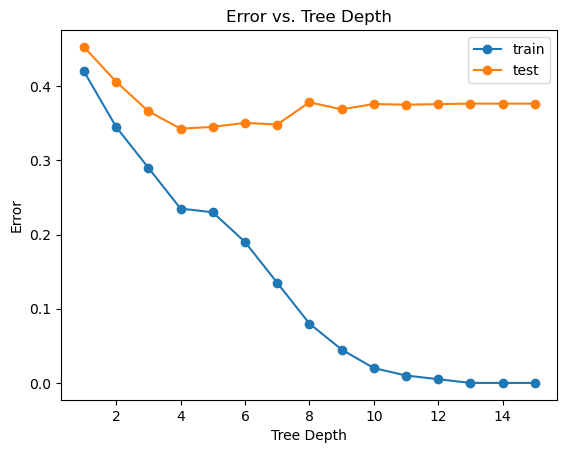

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss

#Setting the maximal depth to 15 according to the previous question
max_depth = 15
depths = np.arange(1, max_depth+1)
errors_train = []
errors_test = []

for depth in depths:
    # Create a decision tree classifier with the specified depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Predict the classes for the train/test set
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Calculate the error and append it to the errors list
    error_train = zero_one_loss(y_train, y_pred_train)
    error_test = zero_one_loss(y_test, y_pred_test)
    errors_train.append(error_train)
    errors_test.append(error_test)

# Plot the error as a function of tree depth
plt.plot(depths, errors_train, "-o", label="train")
plt.plot(depths, errors_test, "-o", label="test")
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.title('Error vs. Tree Depth')
plt.legend(loc="upper right")
plt.show()

# **Answer**: We want to find the value of the depth that minimizes the test error. 
# In the plot below, we see that the error first decreases, then increases a bit. 
# The minimal value seems to occur for a depth equal to 4. 
# Note that, choosing the optimal value based on the training error only would lead to choose a maximal depth, 
# which would result in a large test error. 

**6) Now we want to find the optimal value for the parameter max-leaf-nodes. To this aim, plot the test error as a function of the number of leaves. Comment.** 

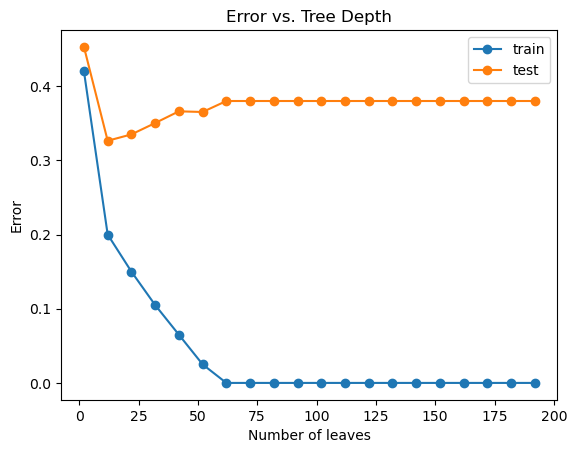

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss

#Setting the maximal depth to 15 according to the previous question
max_leaves = 200
leaves = np.arange(2, max_leaves+1, 10)
errors_train = []
errors_test = []

for nb_leaves in leaves:
    # Create a decision tree classifier with the specified depth
    clf = DecisionTreeClassifier(max_leaf_nodes=nb_leaves, random_state=42)
    clf.fit(X_train, y_train)

    # Predict the classes for the train/test set
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Calculate the error and append it to the errors list
    error_train = zero_one_loss(y_train, y_pred_train)
    error_test = zero_one_loss(y_test, y_pred_test)
    errors_train.append(error_train)
    errors_test.append(error_test)

# Plot the error as a function of tree depth
plt.plot(leaves, errors_train, "-o", label="train")
plt.plot(leaves, errors_test, "-o", label="test")
plt.xlabel('Number of leaves')
plt.ylabel('Error')
plt.title('Error vs. Tree Depth')
plt.legend(loc="upper right")
plt.show()

# While the training error decreases as the number of leaves increases, the test error reaches some minimal value
# for a very small number of leaves. 
# This shows that very deep trees are not the ones that lead to the best predictive performance
# Small trees are cheaper in terms of memory, computations (at test time), and are also more interpretable.

**7) Finally, we want to study the impact of pruning. To this aim, plot the test error as a function of the complexity parameter 'ccp_alpha'. Comment.**

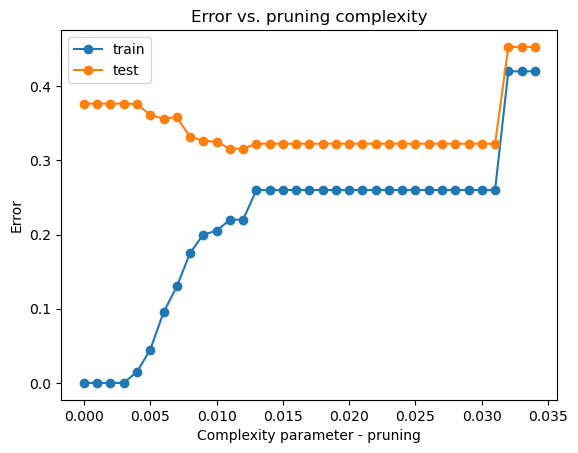

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss

#Setting the maximal depth to 15 according to the previous question
ccp = np.arange(0, 0.035, 0.001)
errors_train = []
errors_test = []

for ccp_value in ccp:
    # Create a decision tree classifier with the specified depth
    clf = DecisionTreeClassifier(ccp_alpha=ccp_value, random_state=42)
    clf.fit(X_train, y_train)

    # Predict the classes for the train/test set
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Calculate the error and append it to the errors list
    error_train = zero_one_loss(y_train, y_pred_train)
    error_test = zero_one_loss(y_test, y_pred_test)
    errors_train.append(error_train)
    errors_test.append(error_test)

# Plot the error as a function of tree depth
plt.plot(ccp, errors_train, "-o", label="train")
plt.plot(ccp, errors_test, "-o", label="test")
plt.xlabel('Complexity parameter - pruning')
plt.ylabel('Error')
plt.title('Error vs. pruning complexity')
plt.legend(loc="upper left")
plt.show()

# Again, while the best parameter regarding the training error is zero, 
# the parameter that leads to the smallest test error is somewhere around 0.010,
# which corresponds to a non-fully-grown tree. 

## 2 - Applying Decision Trees on a real data set.

Now, we want to apply a decision tree to solve a real problem. Let us consider the following real estate data set.

In [3]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt

house = fetch_california_housing()
X, y = house.data, house.target
feature_names = house.feature_names

feature_mapping = {
    "MedInc": "Median income in block",
    "HousAge": "Median house age in block",
    "AveRooms": "Average number of rooms",
    "AveBedrms": "Average number of bedrooms",
    "Population": "Block population",
    "AveOccup": "Average house occupancy",
    "Latitude": "House block latitude",
    "Longitude": "House block longitude",
}

**8) Use the command 'train_test_split' to split the data set into a training set and test set. The test set will only be used to assess the performance of our final estimator.** 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**9) Train a decision tree on the above data using default parameters. Evaluate its quadratic risk on the training set and on the test set. Comment.**

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

#Create a decision tree object with the complexity parameter find above
clf_default = DecisionTreeRegressor(random_state=42)

#Train the decision tree on the whole training set
clf_default.fit(X_train, y_train)

# Compute the predictions for the training set
y_pred_train = clf_default.predict(X_train)
# Compute the predictions for the test set
y_pred_test = clf_default.predict(X_test)

#Compute the MSE to evaluate the performance of the tree on the train set
mse_train = mean_squared_error(y_train, y_pred_train)
#Compute the MSE to evaluate the performance of the tree on the test set
mse_test = mean_squared_error(y_test, y_pred_test)

print("The Mean Squared Eror on the train set is:", mse_train)
print("The Mean Squared Error on the test set is:", mse_test)

#The error on the train set should be zero. Due to machine precision, it may be nonzero but should be less than 10**-16
#The error on the test set is larger than that on the train set (which was expected). We may want to tune the hyperparameters to improve the performances on the test set. 

The Mean Squared Eror on the train set is: 8.016009069203175e-32
The Mean Squared Error on the test set is: 0.544378289771279


**10) Tune the complexity parameter of the pruning by cross-validation by evaluating parameter values between 0.001 and 0.03. You can make use of the command 'cross_val_score'. Comment.**

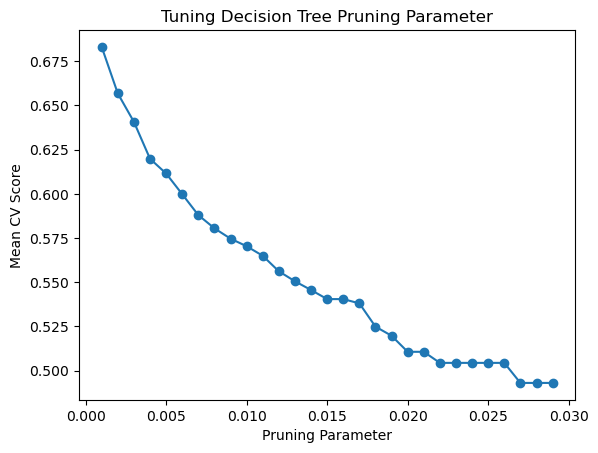

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Define the range of pruning parameter values to test
pruning_params = np.arange(0.001, 0.03, 0.001)

# Store the mean cross-validation scores for each pruning parameter value
cv_scores = []

# Perform cross-validation for each pruning parameter value
for param in pruning_params:
    # Create a decision tree classifier with the specified pruning parameter
    clf = DecisionTreeRegressor(ccp_alpha=param, random_state=42)

    # Perform cross-validation and calculate the mean score, which is the coefficient of determination (R2) in regression
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)

# Plot the mean cross-validation scores as a function of pruning parameter values
plt.plot(pruning_params, cv_scores, marker='o')
plt.xlabel('Pruning Parameter')
plt.ylabel('Mean CV Score')
plt.title('Tuning Decision Tree Pruning Parameter')
plt.show()

# Based on the plot below, we need to choose a more precise grid, 
# in order to find the maximal value of the score, and the corresponding complexity parameter.

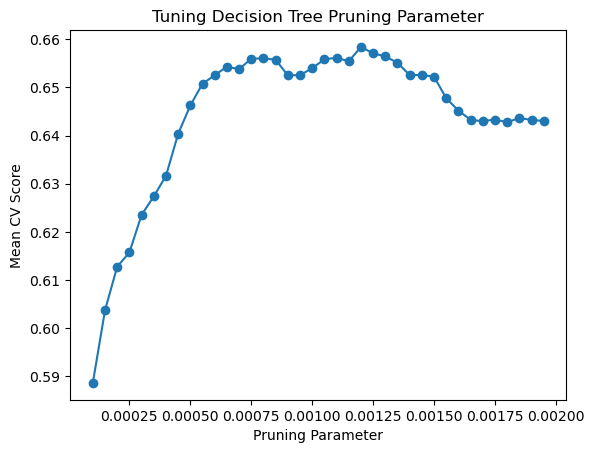

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Define the range of pruning parameter values to test
pruning_params = np.arange(0.0001, 0.002, 0.00005)

# Store the mean cross-validation scores for each pruning parameter value
cv_scores = []

# Perform cross-validation for each pruning parameter value
for param in pruning_params:
    # Create a decision tree classifier with the specified pruning parameter
    clf = DecisionTreeRegressor(ccp_alpha=param, random_state=42)

    # Perform cross-validation and calculate the mean score, which is the coefficient of determination (R2) in regression
    scores = cross_val_score(clf, X_train, y_train, cv=2)
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)

# Plot the mean cross-validation scores as a function of pruning parameter values
plt.plot(pruning_params, cv_scores, marker='o')
plt.xlabel('Pruning Parameter')
plt.ylabel('Mean CV Score')
plt.title('Tuning Decision Tree Pruning Parameter')
plt.show()


**11) Based on the previous question, find the pruning parameter that leads to the best predictive performance.**

In [8]:
# The index corresponding to the largest cv_score can be found using argmax command
best_index = np.argmax(cv_scores)
# The corresponding penalization complexity parameter is 
best_cp = pruning_params[best_index]
print("The best value for the complexity parameter is", best_cp)

The best value for the complexity parameter is 0.0012000000000000003


**12) Train a tree on the whole training set with the best pruning complexity (the one determined above) and evaluate its performance on the test set.**

In [9]:
from sklearn.metrics import mean_absolute_error

#Create a decision tree object with the complexity parameter find above
clf = DecisionTreeRegressor(ccp_alpha=best_cp, random_state=42)

#Train the decision tree on the whole training set
clf.fit(X_train, y_train)

# Compute the predictions 
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

#Compute the MSE to evaluate the performance of the tree
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("The Mean Squared Eror on the train set is:", mse_train)
print("The Mean Squared Error on the test set is:", mse_test)

# The error obtained here on the test set is lower than that from the first tree, with default parameters. 
# Using default parameters for a single decision tree is a bad idea: a single decision systematically overfits the data.

The Mean Squared Eror on the train set is: 0.3727127303581366
The Mean Squared Error on the test set is: 0.4595873763000699


**13) Plot the first level of the tree. Comment.**

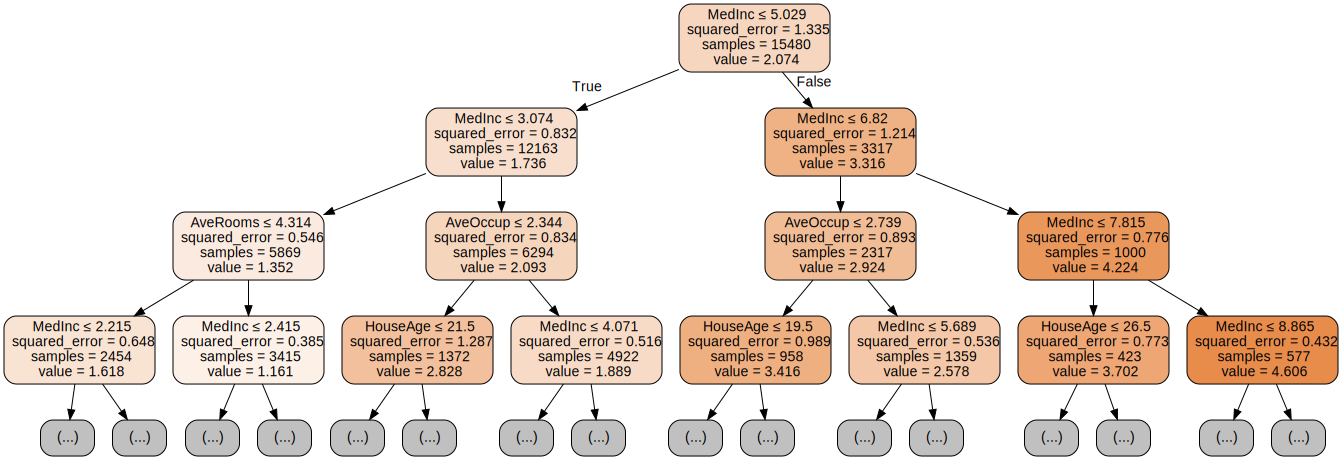

In [11]:
import graphviz 
from sklearn import tree


dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3, feature_names=house.feature_names,  filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


In [12]:

# It is difficult to interpret the full tree which seems quite deep. 
print("You can access the depth of the tree with the command clf.tree_.max_depth")
print("Here the depth of the tree equals", clf.tree_.max_depth)

#By plotting the first levels of the tree, we see that the Median Income seems to be an important variable for the prediction. 
# It is the only variable used in the first two levels of the tree.
# In the next levels, other variables are used, thus making the whole tree difficult to interpret. 

You can access the depth of the tree with the command clf.tree_.max_depth
Here the depth of the tree equals 11
